In [2]:
import matplotlib.pyplot as plt

# Define the clipping region (window)
x_min, x_max, y_min, y_max = 2, 8, 2, 6

# Define the line segment (p1 and p2 are endpoints)
p1 = (1, 4)
p2 = (9, 8)

# Cohen-Sutherland line clipping function
def cohen_sutherland(p1, p2):

    # Define region codes for the endpoints p1 and p2
    def region_code(p):
        code = 0
        if p[0] < x_min:
            code |= 1
        elif p[0] > x_max:
            code |= 2
        if p[1] < y_min:
            code |= 4
        elif p[1] > y_max:
            code |= 8
        return code

    code1 = region_code(p1)
    code2 = region_code(p2)

    while True:
        if not (code1 | code2):  # Both endpoints are inside the region
            return p1, p2
        if code1 & code2:  # Both endpoints are outside on the same side
            return None, None

        # Select the endpoint to clip
        if code1:
            code_out = code1
        else:
            code_out = code2

        # Find the intersection point
        if code_out & 1:  # Left
            x = x_min
            y = p1[1] + (p2[1] - p1[1]) * (x_min - p1[0]) / (p2[0] - p1[0])
        elif code_out & 2:  # Right
            x = x_max
            y = p1[1] + (p2[1] - p1[1]) * (x_max - p1[0]) / (p2[0] - p1[0])
        elif code_out & 4:  # Bottom
            y = y_min
            x = p1[0] + (p2[0] - p1[0]) * (y_min - p1[1]) / (p2[1] - p1[1])
        elif code_out & 8:  # Top
            y = y_max
            x = p1[0] + (p2[0] - p1[0]) * (y_max - p1[1]) / (p2[1] - p1[1])

        # Update the endpoint with the intersection point
        if code_out == code1:
            p1 = (x, y)
            code1 = region_code(p1)
        else:
            p2 = (x, y)
            code2 = region_code(p2)


In [3]:
# Perform line clipping
clipped_p1, clipped_p2 = cohen_sutherland(p1, p2)

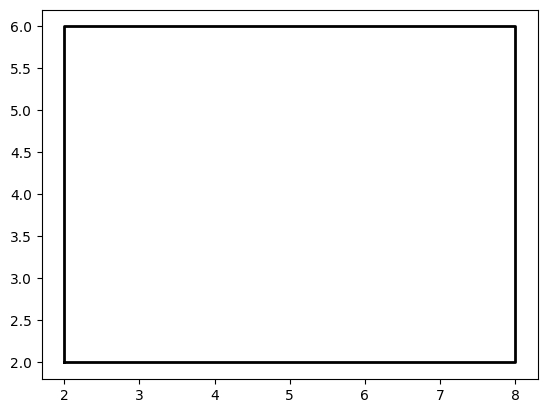

In [4]:
# Create a plot to visualize the result
plt.figure()
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'k-', linewidth=2)

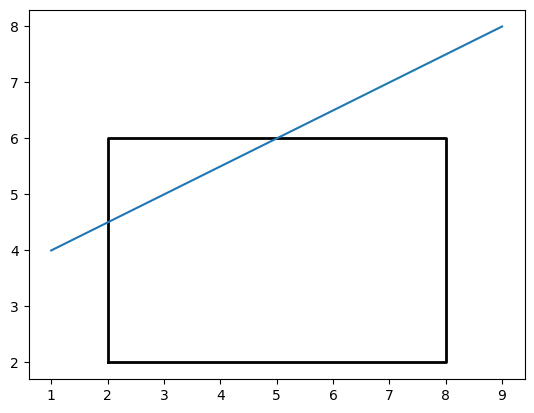

In [8]:
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'k-', linewidth=2)
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])


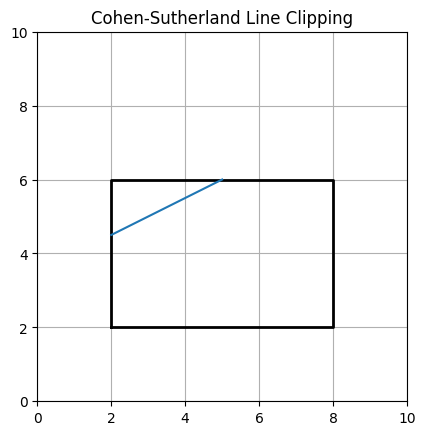

In [9]:

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'k-', linewidth=2)
if clipped_p1 and clipped_p2:
    plt.plot([clipped_p1[0], clipped_p2[0]], [clipped_p1[1], clipped_p2[1]])

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Cohen-Sutherland Line Clipping")
plt.show()